**Loading Libraries**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

**Reading and checking data**

In [2]:
df = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Handling of null values**

In [3]:
null_value = df.isna().sum().sort_values(ascending=False)
null_value[null_value > 0]

bmi    201
dtype: int64

In [4]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
null_value = df.isna().sum().sort_values(ascending=False)
null_value[null_value > 0]

Series([], dtype: int64)

**Convert Non-numerical to Numbers**

In [5]:
col_names = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in col_names:
    df[col] = df[col].astype('category').cat.codes

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


**Split Data**

In [6]:
y = df['stroke']
X = df.drop(['stroke', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8888, stratify = df['stroke'])
cols = X.columns
index = X.index

**Scaling**

In [7]:
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

**Modeling**

In [8]:
models = []

models.append(('LR', LogisticRegression(random_state = 8888)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 8888)))
models.append(('RF', RandomForestClassifier(random_state = 8888)))
models.append(('SVM', SVC(gamma='auto', random_state = 8888)))
models.append(('XGB', GradientBoostingClassifier(random_state = 8888)))
models.append(("LightGBM", LGBMClassifier(random_state = 8888)))

# evaluate each model in turn
results = []
names = []

LR: 0.951272 (0.000587)
KNN: 0.947162 (0.002144)
CART: 0.912133 (0.008184)
RF: 0.949902 (0.001298)
SVM: 0.951272 (0.000587)
XGB: 0.949119 (0.001750)
LightGBM: 0.946184 (0.004733)


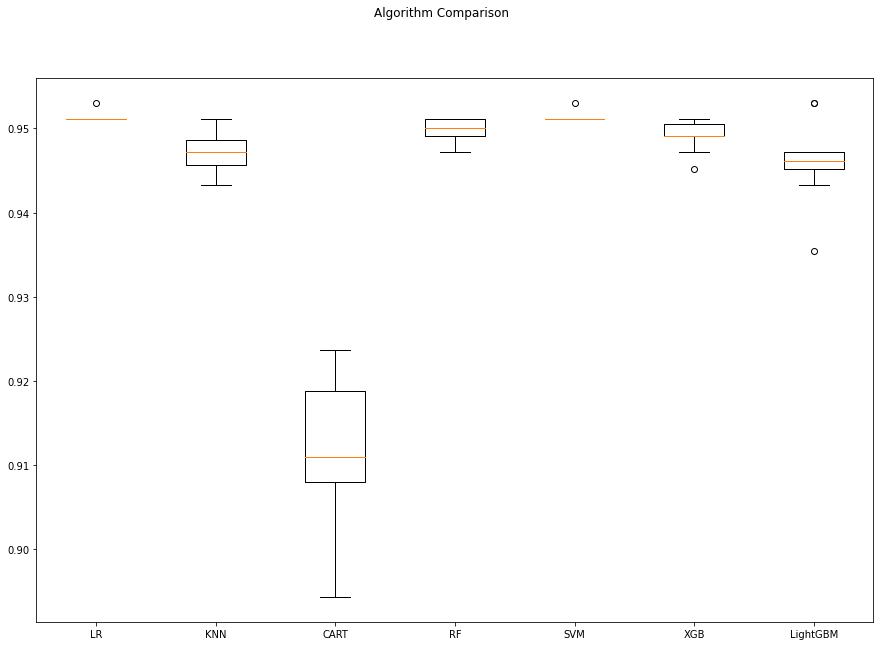

In [9]:
for name, model in models:
        kfold = KFold(n_splits = 10, shuffle=True, random_state = 8888)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()